Checking if nested directory exists: True
Checking if target file exists: True
Is target file a file: True
Attempting to read file: /kaggle/input/mapped/mapped (1).bed/mapped (1).bed
Successfully read data with shape: (4336134, 13)


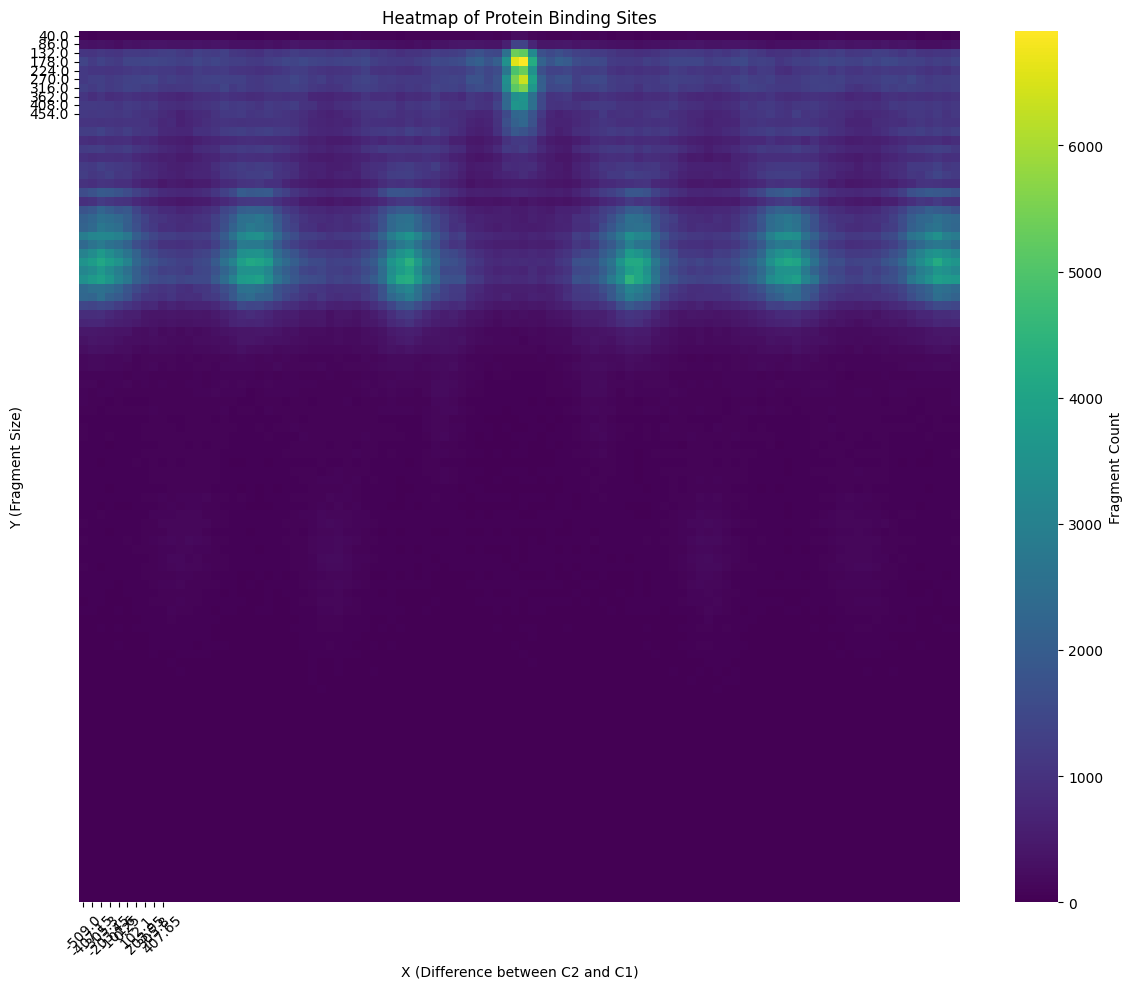

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def create_binding_sites_heatmap(base_directory):
    try:
        nested_dir = os.path.join(base_directory, "mapped (1).bed")
        file_path = os.path.join(nested_dir, "mapped (1).bed")
        
        print(f"Attempting to read file: {file_path}")
        data = pd.read_csv(file_path, sep="\t", header=None, encoding='utf-8')
        
        if data.empty:
            raise ValueError("The input file is empty")
        if len(data.columns) < 10:
            raise ValueError("Input file doesn't have enough columns. Expected at least 10 columns.")

        print(f"Successfully read data with shape: {data.shape}")
        C1 = (data[2] + data[3]) / 2
        C2 = (data[8] + data[9]) / 2
        
        X_vals = C2 - C1
        Y_vals = data[9] - data[8]
        H, xedges, yedges = np.histogram2d(
            X_vals,
            Y_vals,
            bins=[100, 100]
        )
        plt.figure(figsize=(12, 10))
        sns.heatmap(
            H.T,
            cmap="viridis",
            cbar_kws={'label': 'Fragment Count'},
            xticklabels=np.round(xedges[:-1], 2)[::10],
            yticklabels=np.round(yedges[:-1], 2)[::10]
        )
        
        plt.xlabel("X (Difference between C2 and C1)")
        plt.ylabel("Y (Fragment Size)")
        plt.title("Heatmap of Protein Binding Sites")
        
        plt.xticks(rotation=45)
        plt.tight_layout()
        return plt

    except FileNotFoundError as e:
        print(f"Error: {str(e)}")
        print(f"Current working directory: {os.getcwd()}")
        return None
    except pd.errors.EmptyDataError:
        print("Error: The file is empty or contains no valid data.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")
        print(f"Current working directory: {os.getcwd()}")
        return None

base_directory = "/kaggle/input/mapped"
nested_dir = os.path.join(base_directory, "mapped (1).bed")
target_file = os.path.join(nested_dir, "mapped (1).bed")
print(f"Checking if nested directory exists: {os.path.exists(nested_dir)}")
print(f"Checking if target file exists: {os.path.exists(target_file)}")
print(f"Is target file a file: {os.path.isfile(target_file)}")
plot = create_binding_sites_heatmap(base_directory)

if plot is not None:
    plot.show()
else:
    print("\nFailed to create plot. File structure details:")
    for root, dirs, files in os.walk(base_directory):
        print(f"\nDirectory: {root}")
        if dirs:
            print(f"Subdirectories: {dirs}")
        if files:
            print(f"Files: {files}")